# OSNAP line Lagrangian particle tracking investigation of the cold/fresh blob


## Technical preamble

In [1]:
# import matplotlib.colors as colors
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
import seaborn as sns
# from matplotlib.colors import ListedColormap
import cmocean as co
import pandas as pd
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy
import seawater as sw

from matplotlib import colors as c
from matplotlib import ticker
# from xhistogram.xarray import histogram

In [2]:
sns.set(style="darkgrid")

xr.set_options(keep_attrs=True)
np.warnings.filterwarnings('ignore')

sns.set_palette("colorblind")
xr.set_options(keep_attrs=True);

plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=8) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend
plt.rc('savefig', dpi=600)       # higher res outputs

In [3]:
# from dask.distributed import Client

In [4]:
# client = Client(n_workers=1, threads_per_worker=8, memory_limit=48e9)
# client

_(Click on the link above if you want to see the Dask cluster in action.)_

## Set up paths and read in trajectory data

In [5]:
# parameters
project_path = Path.cwd() / '..' / '..' 
project_path = project_path.resolve()

inputPath = Path('data/interim/sumsAndMeans/noNorth/')
input_data_path = project_path / inputPath

# output figures path
figure_path = Path("reports/figures/coldBlob/noNorth")


## Load data

## Load VIKING20X data

We'll first find all the relevant files and then open them as a virtual contiguous dataset.

In [6]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_sum_0 = list(sorted(Path(input_data_path).glob(f"total_sum_0_????.nc/")))
files_labcu_sum_0 = list(sorted(Path(input_data_path).glob(f"labcu_sum_0_????.nc/")))
files_gulfs_sum_0 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_0_????.nc/")))
files_other_sum_0 = list(sorted(Path(input_data_path).glob(f"other_sum_0_????.nc/")))
files_lc60w_sum_0 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_0_????.nc/")))
files_lcdir_sum_0 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_0_????.nc/")))


In [7]:
total_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_total_sum_0],
    dim="time",
)
labcu_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_sum_0],
    dim="time",
)
gulfs_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_sum_0],
    dim="time",
)
other_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_other_sum_0],
    dim="time",
)
lc60w_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_0],
    dim="time",
)
lcdir_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_0],
    dim="time",
)


In [8]:
total_sum_0

<xarray.Dataset>
Dimensions:           (subsetno: 32, time: 2189)
Coordinates:
  * time              (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-2...
Dimensions without coordinates: subsetno
Data variables: (12/32)
    trajectory        (subsetno, time) float64 6.739e+08 6.015e+08 ... 6.083e+08
    lat               (subsetno, time) float64 2.726e+04 2.423e+04 ... 2.43e+04
    lon               (subsetno, time) float64 -1.061e+04 ... -9.683e+03
    z                 (subsetno, time) float64 9.833e+04 9.404e+04 ... 8.936e+04
    mxl               (subsetno, time) float32 1.199e+05 1.274e+05 ... 7.041e+04
    temp              (subsetno, time) float32 4.235e+03 3.787e+03 ... 3.416e+03
    ...                ...
    depth_transport   (subsetno, time) float64 150.7 152.3 135.0 ... 144.5 142.7
    lon_transport     (subsetno, time) float64 -16.29 -15.73 ... -15.31 -15.4
    tempxvol          (subsetno, time) float64 58.21 79.78 69.33 ... 112.9 100.1
    saltxvol          (subsetno, time) float64 235.6 316.2 293.5 ... 468.8 448.9
    depthxvol         (subsetno, time) float64 1.541e+03 2.157e+03 ... 3.094e+03
    lonxvol           (subsetno, time) float64 -157.0 -205.2 ... -296.8 -304.7
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.2
    parcels_mesh:           spherical

In [9]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_sum_1 = list(sorted(Path(input_data_path).glob(f"total_sum_1_????.nc/")))
files_labcu_sum_1 = list(sorted(Path(input_data_path).glob(f"labcu_sum_1_????.nc/")))
files_gulfs_sum_1 = list(sorted(Path(input_data_path).glob(f"gulfs_sum_1_????.nc/")))
files_other_sum_1 = list(sorted(Path(input_data_path).glob(f"other_sum_1_????.nc/")))
files_lc60w_sum_1 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_1_????.nc/")))
files_lcdir_sum_1 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_1_????.nc/")))


In [10]:
total_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_total_sum_1],
    dim="time",
)
labcu_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_sum_1],
    dim="time",
)
gulfs_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_sum_1],
    dim="time",
)
other_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_other_sum_1],
    dim="time",
)
lc60w_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_1],
    dim="time",
)
lcdir_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_1],
    dim="time",
)


In [11]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"total_sum_sourcetime_????.nc/")))
files_labcu_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"labcu_sum_sourcetime_????.nc/")))
files_gulfs_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"gulfs_sum_sourcetime_????.nc/")))
files_other_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"other_sum_sourcetime_????.nc/")))
files_lc60w_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"lc60w_sum_sourcetime_????.nc/")))
files_lcdir_sum_sourcetime = list(sorted(Path(input_data_path).glob(f"lcdir_sum_sourcetime_????.nc/")))


In [12]:
total_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_total_sum_sourcetime],
    dim="year",
).sum(dim='year')
labcu_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_sum_sourcetime],
    dim="year",
).sum(dim='year')
gulfs_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_sum_sourcetime],
    dim="year",
).sum(dim='year')
other_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_other_sum_sourcetime],
    dim="year",
).sum(dim='year')
lc60w_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_sourcetime],
    dim="year",
).sum(dim='year')
lcdir_sum_sourcetime = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_sourcetime],
    dim="year",
).sum(dim='year')


In [13]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_mean_0 = list(sorted(Path(input_data_path).glob(f"total_mean_0_????.nc/")))
files_labcu_mean_0 = list(sorted(Path(input_data_path).glob(f"labcu_mean_0_????.nc/")))
files_gulfs_mean_0 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_0_????.nc/")))
files_other_mean_0 = list(sorted(Path(input_data_path).glob(f"other_mean_0_????.nc/")))
files_lc60w_mean_0 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_0_????.nc/")))
files_lcdir_mean_0 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_0_????.nc/")))


In [14]:
total_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_total_mean_0],
    dim="time",
)
labcu_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_mean_0],
    dim="time",
)
gulfs_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_mean_0],
    dim="time",
)
other_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_other_mean_0],
    dim="time",
)
lc60w_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_mean_0],
    dim="time",
)
lcdir_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_mean_0],
    dim="time",
)


In [15]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_total_mean_1 = list(sorted(Path(input_data_path).glob(f"total_mean_1_????.nc/")))
files_labcu_mean_1 = list(sorted(Path(input_data_path).glob(f"labcu_mean_1_????.nc/")))
files_gulfs_mean_1 = list(sorted(Path(input_data_path).glob(f"gulfs_mean_1_????.nc/")))
files_other_mean_1 = list(sorted(Path(input_data_path).glob(f"other_mean_1_????.nc/")))
files_lc60w_mean_1 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_1_????.nc/")))
files_lcdir_mean_1 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_1_????.nc/")))


In [16]:
total_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_total_mean_1],
    dim="time",
)
labcu_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_labcu_mean_1],
    dim="time",
)
gulfs_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_gulfs_mean_1],
    dim="time",
)
other_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_other_mean_1],
    dim="time",
)
lc60w_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_mean_1],
    dim="time",
)
lcdir_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_mean_1],
    dim="time",
)


In [17]:
total_sum_sourcetime=total_sum_sourcetime.rename_dims({'time_bins':'time'})
labcu_sum_sourcetime=labcu_sum_sourcetime.rename_dims({'time_bins':'time'})
gulfs_sum_sourcetime=gulfs_sum_sourcetime.rename_dims({'time_bins':'time'})
other_sum_sourcetime=other_sum_sourcetime.rename_dims({'time_bins':'time'})
lc60w_sum_sourcetime=lc60w_sum_sourcetime.rename_dims({'time_bins':'time'})
lcdir_sum_sourcetime=lcdir_sum_sourcetime.rename_dims({'time_bins':'time'})


In [18]:
total_sum_sourcetime=total_sum_sourcetime.rename_vars({'time_bins':'time'})
labcu_sum_sourcetime=labcu_sum_sourcetime.rename_vars({'time_bins':'time'})
gulfs_sum_sourcetime=gulfs_sum_sourcetime.rename_vars({'time_bins':'time'})
other_sum_sourcetime=other_sum_sourcetime.rename_vars({'time_bins':'time'})
lc60w_sum_sourcetime=lc60w_sum_sourcetime.rename_vars({'time_bins':'time'})
lcdir_sum_sourcetime=lcdir_sum_sourcetime.rename_vars({'time_bins':'time'})


In [19]:
total_mean_0

<xarray.Dataset>
Dimensions:           (subsetno: 32, time: 2189)
Coordinates:
  * time              (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-2...
Dimensions without coordinates: subsetno
Data variables: (12/32)
    trajectory        (subsetno, time) float64 1.437e+06 1.442e+06 ... 1.455e+06
    lat               (subsetno, time) float64 58.11 58.11 58.11 ... 58.14 58.13
    lon               (subsetno, time) float64 -22.61 -22.77 ... -23.28 -23.17
    z                 (subsetno, time) float64 209.7 225.5 207.9 ... 216.0 213.8
    mxl               (subsetno, time) float32 255.7 305.5 313.9 ... 168.0 168.4
    temp              (subsetno, time) float32 9.029 9.081 9.045 ... 8.34 8.172
    ...                ...
    depth_transport   (subsetno, time) float64 0.3214 0.3651 ... 0.355 0.3415
    lon_transport     (subsetno, time) float64 -0.03474 -0.03772 ... -0.03685
    tempxvol          (subsetno, time) float64 0.1241 0.1913 ... 0.2773 0.2394
    saltxvol          (subsetno, time) float64 0.5023 0.7583 ... 1.152 1.074
    depthxvol         (subsetno, time) float64 3.285 5.173 4.688 ... 7.437 7.403
    lonxvol           (subsetno, time) float64 -0.3347 -0.492 ... -0.7289
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.2
    parcels_mesh:           spherical

In [23]:
def plot_line_with_errorbars(ds,roll,ax,colour,label=''):

    rolling = (ds.sum(dim='subsetno').rolling(time=roll,center=True).mean())
    std = ((32*ds.rolling(time=roll,center=True).mean()).std(dim='subsetno'))
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,linewidth=0.5)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.5,linewidth=0)
    return

def plot_line_with_errorbars_ratio(ds,ds1,roll,ax,colour,label=''):

    rolling = (ds.sum(dim='subsetno').rolling(time=roll,center=True).mean())/(ds1.sum(dim='subsetno').rolling(time=roll,center=True).mean())
    std = ((ds.rolling(time=roll,center=True).mean()/ds1.rolling(time=roll,center=True).mean()).std(dim='subsetno'))
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,linewidth=0.5)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.5,linewidth=0)
    return


def plot_transports_by_osnap_and_sourcetime(total_0,labcu_0,gulfs_0,other_0,
                                            total_s,labcu_s,gulfs_s,other_s,
                                            roll_time,
                                            figname):
    
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(2,1,figsize = (8,5), sharex=True,gridspec_kw={'hspace': 0.05,'wspace': 0.05})

    plot_line_with_errorbars(total_0.vol_trans_normal,roll_time,ax[0],'k',label='total')
    plot_line_with_errorbars(total_0.vol_trans_normal-other_0.vol_trans_normal,roll_time,ax[0],'C0',label='total identified')
    plot_line_with_errorbars(labcu_0.vol_trans_normal,roll_time,ax[0],'C1',label='Labrador Sea')
    plot_line_with_errorbars(gulfs_0.vol_trans_normal,roll_time,ax[0],'C2',label='Gulf Stream')
    plot_line_with_errorbars(other_0.vol_trans_normal,roll_time,ax[0],'C7',label='other')
    
    plot_line_with_errorbars((total_s.vol_trans_normal-other_s.vol_trans_normal).isel(time=slice(620,2456,1)),roll_time,ax[1],'C0',label='total identified')
    plot_line_with_errorbars(labcu_s.vol_trans_normal.isel(time=slice(620,2456,1)),roll_time,ax[1],'C1',label='Labrador Sea')
    plot_line_with_errorbars(gulfs_s.vol_trans_normal.isel(time=slice(620,2456,1)),roll_time,ax[1],'C2',label='Gulf Stream')
    
    ax[0].set_ylabel('transport [Sv]')
    ax[0].set_xlabel('')
    ax[0].set_ylim(bottom=0,top=22)

    lgd = ax[0].legend(loc='lower center',bbox_to_anchor=[0.5,-1.65],ncol=3)
    ax[1].set_ylabel('transport [Sv]')
    ax[1].set_xlabel('')
    ax[1].set_ylim(bottom=0,top=22)
    

# #     plt.tight_layout()

# #     title=fig.suptitle('Volumes and transports across OSNAP line by source. 37 to 0 $\degree$W, upper 500 m.')
    
# #     plt.savefig(project_path / figure_path / 'plot_transports_by_source_37WtoScot_500M.eps', bbox_extra_artists=(lgd,))
    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    
    return

def plot_transports_by_path_by_osnap_and_sourcetime(labcu_0,
                                                    lc60w_0,
                                                    lcdir_0,
                                                    labcu_s,
                                                    lc60w_s,
                                                    lcdir_s,
                                                    roll_time,
                                                    figname):
    
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(2,figsize = (8,5), sharex=True,gridspec_kw={'hspace': 0.05,'wspace': 0.05})

    plot_line_with_errorbars(labcu_0.vol_trans_normal,roll_time,ax[0],'C1',label='Labrador Sea')
    plot_line_with_errorbars(lc60w_0.vol_trans_normal,roll_time,ax[0],'C4',label='60$\degree$W path')
    plot_line_with_errorbars(lcdir_0.vol_trans_normal,roll_time,ax[0],'C9',label='direct path')
    
    plot_line_with_errorbars(labcu_s.vol_trans_normal.isel(time=slice(620,2456,1)),roll_time,ax[1],'C1',label='Labrador Sea')
    plot_line_with_errorbars(lc60w_s.vol_trans_normal.isel(time=slice(620,2456,1)),roll_time,ax[1],'C4',label='60$\degree$W path')
    plot_line_with_errorbars(lcdir_s.vol_trans_normal.isel(time=slice(620,2456,1)),roll_time,ax[1],'C9',label='direct path')
        
    ax[0].set_ylabel('transport [Sv]')
    ax[0].set_xlabel('')
    ax[0].set_ylim(bottom=0,top=10)

    lgd = ax[0].legend(loc='lower center',bbox_to_anchor=[0.5,-1.51],ncol=3)
    ax[1].set_ylabel('transport [Sv]')
    ax[1].set_xlabel('')
    ax[1].set_ylim(bottom=0,top=10)
    

# #     plt.tight_layout()

# #     title=fig.suptitle('Volumes and transports across OSNAP line by source. 37 to 0 $\degree$W, upper 500 m.')
    
# #     plt.savefig(project_path / figure_path / 'plot_transports_by_source_37WtoScot_500M.eps', bbox_extra_artists=(lgd,))
    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    
    return


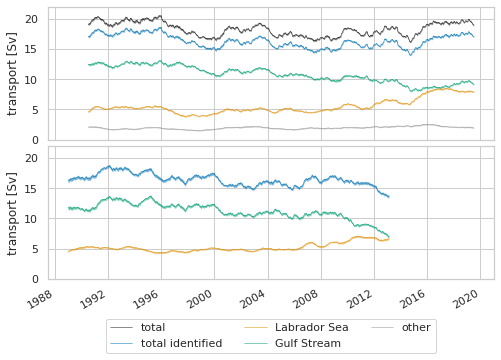

In [24]:
plot_transports_by_osnap_and_sourcetime(total_sum_0,
                                        labcu_sum_0,
                                        gulfs_sum_0,
                                        other_sum_0,
                                        total_sum_sourcetime,
                                        labcu_sum_sourcetime,
                                        gulfs_sum_sourcetime,
                                        other_sum_sourcetime,
                                        73,
                          'plot_transports_by_osnap_and_sourcetime_20211101')

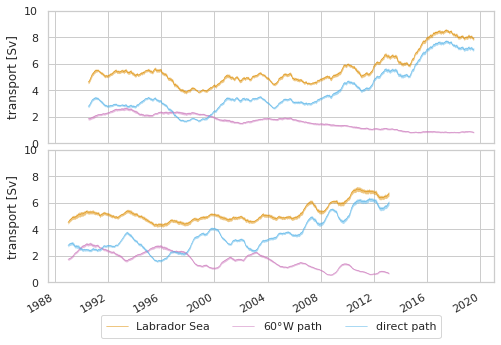

In [22]:
plot_transports_by_path_by_osnap_and_sourcetime(labcu_sum_0,
                                                lc60w_sum_0,
                                                lcdir_sum_0,
                                                labcu_sum_sourcetime,
                                                lc60w_sum_sourcetime,
                                                lcdir_sum_sourcetime,
                                                73,
                          'plot_transports_by_path_by_osnap_and_sourcetime_20211101')

In [25]:
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[]):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = ((ds.rolling(time=roll,center=True).mean()).std(dim='subsetno'))
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,dashes=dashes)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


def plot_ts_by_source(total_mean_a,labcu_mean_a,gulfs_mean_a,
                                total_mean_b,labcu_mean_b,gulfs_mean_b,
                                mean_window,
                                figname):
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(2,2,figsize = (9,7),sharex=True,gridspec_kw={'height_ratios': [3, 1]})

    plot_ts_with_errorbars(labcu_mean_b.salt,mean_window,ax[0,0],'C1',label='Labrador Sea')
    plot_ts_with_errorbars(gulfs_mean_b.salt,mean_window,ax[0,0],'C2',label='Gulf Stream')
    plot_ts_with_errorbars(total_mean_b.salt,mean_window,ax[0,0],'k',label='total')
    
    plot_ts_with_errorbars(total_mean_a.salt,mean_window,ax[0,0],'k',label='total',dashes=[10, 6])
    plot_ts_with_errorbars(labcu_mean_a.salt,mean_window,ax[0,0],'C1',label='Labrador Sea',dashes=[10, 6])
    plot_ts_with_errorbars(gulfs_mean_a.salt,mean_window,ax[0,0],'C2',label='Gulf Stream',dashes=[10, 6])
    
    ax[0,0].set_ylabel('salinity [PSU]')
    ax[0,0].set_xlabel('')
    ax[0,0].yaxis.set_ticks(np.arange(34, 36, 0.2))

    
    plot_ts_with_errorbars((total_mean_b.salt-total_mean_a.salt),mean_window,ax[1,0],'k',label='total')
    plot_ts_with_errorbars((labcu_mean_b.salt-labcu_mean_a.salt),mean_window,ax[1,0],'C1',label='total')
    plot_ts_with_errorbars((gulfs_mean_b.salt-gulfs_mean_a.salt),mean_window,ax[1,0],'C2',label='total')

    ax[1,0].set_ylabel('salinity change [PSU]')
    ax[1,0].set_xlabel('')
    ax[1,0].set_ylim((-0.65,1.35))
    

    
    plot_ts_with_errorbars(labcu_mean_b.temp,mean_window,ax[0,1],'C1',label='Labrador Sea')
    plot_ts_with_errorbars(gulfs_mean_b.temp,mean_window,ax[0,1],'C2',label='Gulf Stream')
    plot_ts_with_errorbars(total_mean_b.temp,mean_window,ax[0,1],'k',label='total')
    
    plot_ts_with_errorbars(total_mean_a.temp,mean_window,ax[0,1],'k',label='total',dashes=[10, 6])
    plot_ts_with_errorbars(labcu_mean_a.temp,mean_window,ax[0,1],'C1',label='Labrador Sea',dashes=[10, 4])
    plot_ts_with_errorbars(gulfs_mean_a.temp,mean_window,ax[0,1],'C2',label='Gulf Stream',dashes=[10, 6])

    ax[0,1].yaxis.set_label_position("right")
    ax[0,1].yaxis.tick_right()    
    ax[0,1].set_ylabel('temperature [$\degree$C]')
    ax[0,1].set_xlabel('')
    
    plot_ts_with_errorbars((total_mean_b.temp-total_mean_a.temp),mean_window,ax[1,1],'k',label='total')
    plot_ts_with_errorbars((labcu_mean_b.temp-labcu_mean_a.temp),mean_window,ax[1,1],'C1',label='total')
    plot_ts_with_errorbars((gulfs_mean_b.temp-gulfs_mean_a.temp),mean_window,ax[1,1],'C2',label='total')

#     ((other_mean.temp_transport-other_mean_1.temp_transport).rolling(time=19,center=True).mean()/other_mean.vol_trans_normal.rolling(time=19,center=True).mean()).plot(ax=ax[0],label='other')
    ax[1,1].yaxis.set_label_position("right")
    ax[1,1].yaxis.tick_right()    
    ax[1,1].set_ylabel('temperature change [$\degree$C]')
    ax[1,1].set_xlabel('')
    ax[1,1].set_ylim((-7.5,7.5))
#     ax[4].set_xlabel('')

    plt.tight_layout()

#     title=fig.suptitle('transportweighted_mean_properties_by_source')
    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_inches='tight')
    
    
    return

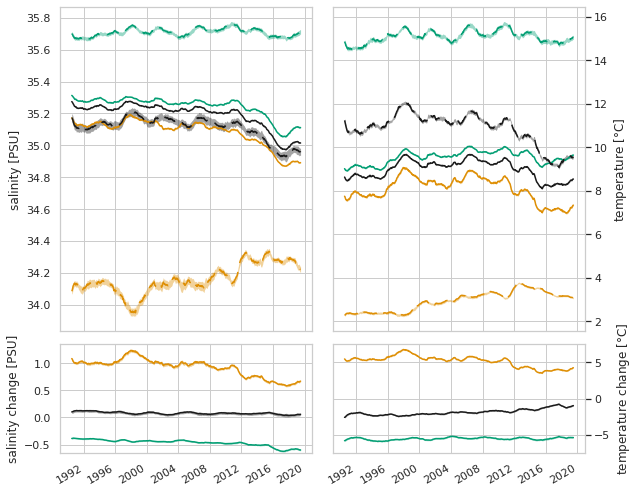

In [26]:
plot_ts_by_source(total_mean_1,
                  labcu_mean_1,
                  gulfs_mean_1,
                  total_mean_0,
                  labcu_mean_0,
                  gulfs_mean_0,
                  73,
                  'ts_timeseries_annualmean_20211101')

In [75]:
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[],zorder=10):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = ((ds.rolling(time=roll,center=True).mean()).std(dim='subsetno'))
    rolling.plot(ax=ax,color=colour,label=label,dashes=dashes,zorder=zorder)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


def plot_ts_by_source_2(total_mean_a,labcu_mean_a,gulfs_mean_a,other_mean_a,
                                total_mean_b,labcu_mean_b,gulfs_mean_b,other_mean_b,
                                mean_window,
                                figname):
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(1,2,figsize = (9,5),sharex=True)

#     plot_ts_with_errorbars(labcu_mean_b.salt,mean_window,ax[0],'C1',label='Labrador Sea')
#     plot_ts_with_errorbars(gulfs_mean_b.salt,mean_window,ax[0],'C2',label='Gulf Stream')
    plot_ts_with_errorbars(total_mean_b.salt,mean_window,ax[0],'k',label='total')
    
    plot_ts_with_errorbars(total_mean_a.salt,mean_window,ax[0],'k',label='total',dashes=[10, 6],zorder=10)
    plot_ts_with_errorbars(labcu_mean_a.salt,mean_window,ax[0],'C1',label='Labrador Sea',zorder=9)
    plot_ts_with_errorbars(gulfs_mean_a.salt,mean_window,ax[0],'C2',label='Gulf Stream',zorder=8)
    plot_ts_with_errorbars(other_mean_a.salt,mean_window,ax[0],'C7',label='other',zorder=7)
    
    ax[0].set_ylabel('salinity [PSU]')
    ax[0].set_xlabel('')
    ax[0].yaxis.set_ticks(np.arange(34, 36, 0.2))
    
    ax[0].text(0.05, 0.75, 'Total at OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[0].transAxes)
    ax[0].text(0.05, 0.6, 'Total at source', horizontalalignment='left',transform=ax[0].transAxes)
    ax[0].text(0.05, 0.85, 'Gulf Stream at source', horizontalalignment='left',transform=ax[0].transAxes,color='C2')
    ax[0].text(0.4, 0.1, 'Labrador Sea at source', horizontalalignment='left',transform=ax[0].transAxes,color='C1')
    ax[0].text(0.05, 0.4, 'Other at source', horizontalalignment='left',transform=ax[0].transAxes,color='C7')

        
#     plot_ts_with_errorbars(labcu_mean_b.temp,mean_window,ax[1],'C1',label='Labrador Sea')
#     plot_ts_with_errorbars(gulfs_mean_b.temp,mean_window,ax[1],'C2',label='Gulf Stream')
    plot_ts_with_errorbars(total_mean_b.temp,mean_window,ax[1],'k',label='total')
    
    plot_ts_with_errorbars(total_mean_a.temp,mean_window,ax[1],'k',label='total',dashes=[10, 6],zorder=10)
    plot_ts_with_errorbars(labcu_mean_a.temp,mean_window,ax[1],'C1',label='Labrador Sea',zorder=9)
    plot_ts_with_errorbars(gulfs_mean_a.temp,mean_window,ax[1],'C2',label='Gulf Stream',zorder=8)
    plot_ts_with_errorbars(other_mean_a.temp,mean_window,ax[1],'C7',label='other',zorder=7)

    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()    
    ax[1].set_ylabel('temperature [$\degree$C]')
    ax[1].set_xlabel('')
    ax[1].text(0.4, 0.42, 'Total at OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[1].transAxes)
    ax[1].text(0.5, 0.7, 'Total at source', horizontalalignment='left',transform=ax[1].transAxes)
    ax[1].text(0.05, 0.82, 'Gulf Stream at source', horizontalalignment='left',transform=ax[1].transAxes,color='C2')
    ax[1].text(0.05, 0.15, 'Labrador Sea at source', horizontalalignment='left',transform=ax[1].transAxes,color='C1')
    ax[1].text(0.05, 0.53, 'Other', horizontalalignment='left',transform=ax[1].transAxes,color='C7')
    

    plt.tight_layout()

#     title=fig.suptitle('transportweighted_mean_properties_by_source')
    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_inches='tight')
    
    
    return

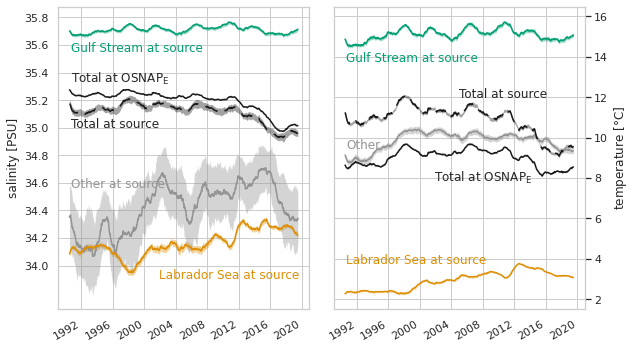

In [76]:
plot_ts_by_source_2(total_mean_1,
                  labcu_mean_1,
                  gulfs_mean_1,
                  other_mean_1,
                  total_mean_0,
                  labcu_mean_0,
                  gulfs_mean_0,
                  other_mean_0,
                  73,
                  'ts_timeseries_annualmean_2_20211101')

In [77]:
labcu_mean_0

<xarray.Dataset>
Dimensions:           (subsetno: 32, time: 2189)
Coordinates:
  * time              (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-2...
Dimensions without coordinates: subsetno
Data variables: (12/32)
    trajectory        (subsetno, time) float64 1.144e+06 1.222e+06 ... 1.096e+06
    lat               (subsetno, time) float64 58.46 58.36 58.46 ... 58.43 58.5
    lon               (subsetno, time) float64 -26.55 -25.75 ... -27.01 -27.89
    z                 (subsetno, time) float64 192.2 219.6 204.2 ... 192.7 198.8
    mxl               (subsetno, time) float32 249.5 288.0 311.1 ... 141.4 139.3
    temp              (subsetno, time) float32 8.172 8.259 8.153 ... 7.376 7.008
    ...                ...
    depth_transport   (subsetno, time) float64 0.2947 0.3519 ... 0.3064 0.3161
    lon_transport     (subsetno, time) float64 -0.04144 -0.04348 ... -0.04447
    tempxvol          (subsetno, time) float64 0.1154 0.1576 ... 0.2259 0.2077
    saltxvol          (subsetno, time) float64 0.527 0.6987 ... 1.097 1.141
    depthxvol         (subsetno, time) float64 3.019 4.781 5.934 ... 7.008 7.601
    lonxvol           (subsetno, time) float64 -0.4251 -0.5437 ... -0.9275
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.2
    parcels_mesh:           spherical

In [78]:
labcu_sum_vol_trans = labcu_sum_0.sum(dim='subsetno').vol_trans_normal
gulfs_sum_vol_trans = gulfs_sum_0.sum(dim='subsetno').vol_trans_normal
total_sum_vol_trans = total_sum_0.sum(dim='subsetno').vol_trans_normal



In [79]:
labcu_sum_vol_trans.attrs['long_name']='Volume transport normal to section'
labcu_sum_vol_trans.attrs['units']='Sv'
gulfs_sum_vol_trans.attrs['long_name']='Volume transport normal to section'
gulfs_sum_vol_trans.attrs['units']='Sv'
total_sum_vol_trans.attrs['long_name']='Volume transport normal to section'
total_sum_vol_trans.attrs['units']='Sv'


In [80]:
labcu_sum_vol_trans

<xarray.DataArray 'vol_trans_normal' (time: 2189)>
array([4.97669468, 4.61723677, 4.87424917, ..., 9.39802689, 9.23986541,
       9.25604102])
Coordinates:
  * time     (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-29T12:00:00
Attributes:
    units:      Sv
    long_name:  Volume transport normal to section

In [81]:
labcu_sum_vol_trans.to_netcdf('lab_current_vol_transport.nc')
gulfs_sum_vol_trans.to_netcdf('gulf_stream_vol_transport.nc')
total_sum_vol_trans.to_netcdf('total_vol_transport.nc')



In [82]:
labcu_sum_0.sum(dim='subsetno').vol_trans_normal

<xarray.DataArray 'vol_trans_normal' (time: 2189)>
array([4.97669468, 4.61723677, 4.87424917, ..., 9.39802689, 9.23986541,
       9.25604102])
Coordinates:
  * time     (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-29T12:00:00
Attributes:
    units:      degrees_north/second
    long_name:  v velocity (raw)

In [83]:
conda list

# packages in environment at /opt/tljh/user/envs/parcels-container_2021.03.17-6c459b7:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                      1_llvm    conda-forge
ansiwrap                  0.8.4                      py_0    conda-forge
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
argon2-cffi               20.1.0           py38h497a2fe_2    conda-forge
asciitree                 0.3.3                      py_2    conda-forge
async_generator           1.10                       py_0    conda-forge
attrs                     20.3.0             pyhd3deb0d_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.1                      py_0    conda-forge
basemap                   1.2.2      

In [84]:
def plot_watermass_balance_timeseries(labcu_0,
                                      labcu_s,
                                      roll_time,
                                      figname):
    sns.set_palette("muted")
        
    fig,ax = plt.subplots(1,1,figsize=(12,6))
    plt.tight_layout()

    plot_line_with_errorbars(labcu_0.vol_trans_normal,roll_time,ax,'C1',label='Labrador Sea arriving at OSNAP-E')
    
    plot_line_with_errorbars(labcu_s.vol_trans_normal.isel(time=slice(620,2529,1)),roll_time,ax,'C9',label='when leaves Labrador Sea')
        
    ax.set_ylabel('transport [Sv]')
    ax.set_xlabel('')
    ax.set_ylim(bottom=0,top=10)

    lgd = ax.legend(loc='lower center',bbox_to_anchor=[1,-1.51],ncol=5)

    ax.set_ylim(bottom=-1.5)
    ax.set_ylim(bottom=-1.5)
    ax.set_xlabel('')

    ax.set_ylabel('Transport [Sv]')
    ax.set_ylabel('Transport [Sv]')


    ax.set_title('')
    ax.set_title('')
    lgd = ax.legend(ncol = 3)

#     title = plt.suptitle('VIKING20X transport across OSNAP-W. MOC upper limb (sigma0 < 27.62)',size='medium',y=1.0)

    plt.savefig(figname + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)
    return


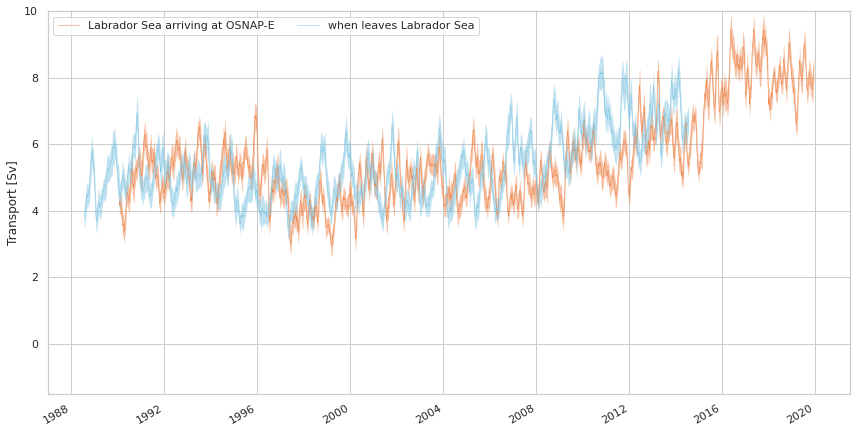

In [85]:
plot_watermass_balance_timeseries(labcu_sum_0,
                                  labcu_sum_sourcetime,
                                  8,
                                  'transport_fromLab_sea')

In [86]:
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[]):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = ((ds.rolling(time=roll,center=True).mean()).std(dim='subsetno'))
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,dashes=dashes)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


def plot_salinity_breakdown(total_mean_a,
                            labcu_mean_a,
                            gulfs_mean_a,
                            other_mean_a,
                            total_mean_b,
                            labcu_mean_b,
                            gulfs_mean_b,
                            other_mean_b,
                            total_sum_a,
                            labcu_sum_a,
                            gulfs_sum_a,
                            other_sum_a,
                            total_sum_b,
                            labcu_sum_b,
                            gulfs_sum_b,
                            other_sum_b,
                            mean_window,
                            figname):
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(3,2,figsize = (12,9),sharex=True,gridspec_kw={'wspace': 0.1,'hspace': 0.1})
    
# salinity    
    
    st_o = total_mean_b.salt
    sl = labcu_mean_a.salt
    sg = gulfs_mean_a.salt
    so = other_mean_a.salt
    
    slbar = sl.mean(dim='time') * sl/sl
    sldash = sl - slbar
    sgbar = sg.mean(dim='time') * sg/sg
    sgdash = sg - sgbar
    sobar = so.mean(dim='time') * so/so
    sodash = so - sobar
    
    vt_o = total_sum_b.vol_trans_normal
    vl = labcu_sum_a.vol_trans_normal
    vg = gulfs_sum_a.vol_trans_normal
    vo = other_sum_a.vol_trans_normal
    
    vlbar = vl.mean(dim='time') * vl/vl
    vldash = vl - vlbar
    vgbar = vg.mean(dim='time') * vg/vg
    vgdash = vg - vgbar
    vobar = vo.mean(dim='time') * vo/vo
    vodash = vo - vobar

    plot_ts_with_errorbars(st_o - st_o.mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'k',
                           label='at OSNAP-E')

    plot_ts_with_errorbars(((sl*vl + sg*vg + so*vo)/vt_o)-
                           ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'C0',
                           label='at source')

    plot_ts_with_errorbars(((st_o-(sl*vl + sg*vg + so*vo)/vt_o))-
                           ((st_o-(sl*vl + sg*vg + so*vo)/vt_o)).mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'C4',
                           label='in transit')


    
    ax[0,0].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[0,0].set_ylabel('salinity anomaly [PSU]')
    ax[0,0].set_xlabel('')
    
   
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C0',
                           label='at source')
    
    plot_ts_with_errorbars((((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar))-
                            ((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C3',
                           label='due to Lab Sea source transport')
    
    plot_ts_with_errorbars((((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                           ((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C7',
                           label='due to Lab Sea source salinity')
    ax[1,0].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[1,0].set_ylabel('salinity anomaly [PSU]')
    ax[1,0].set_xlabel('')

    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[2,0],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar))-
                            ((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar)).mean(dim='time')),
                           mean_window,
                           ax[2,0],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[2,0],
                           colour='C7',
                           label='from Gulf Stream source salinity')
    
    lgd = ax[2,0].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[2,0].set_ylabel('salinity anomaly [PSU]')
    ax[2,0].set_xlabel('')

# temperature    

    st_o = total_mean_b.temp
    sl = labcu_mean_a.temp
    sg = gulfs_mean_a.temp
    so = other_mean_a.temp
    
    slbar = sl.mean(dim='time') * sl/sl
    sldash = sl - slbar
    sgbar = sg.mean(dim='time') * sg/sg
    sgdash = sg - sgbar
    sobar = so.mean(dim='time') * so/so
    sodash = so - sobar
    
    plot_ts_with_errorbars(st_o - st_o.mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'k',
                           label='at OSNAP-E')

    plot_ts_with_errorbars(((sl*vl + sg*vg + so*vo)/vt_o)-
                           ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'C0',
                           label='at source')

    plot_ts_with_errorbars(((st_o-(sl*vl + sg*vg + so*vo)/vt_o))-
                           ((st_o-(sl*vl + sg*vg + so*vo)/vt_o)).mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'C4',
                           label='in transit')


    
    ax[0,1].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[0,1].yaxis.set_label_position("right")
    ax[0,1].yaxis.tick_right()
    ax[0,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[0,1].set_xlabel('')
    
   
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C0',
                           label='at source')
    
    plot_ts_with_errorbars((((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar))-
                            ((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C3',
                           label='due to Lab Sea source transport')
    
    plot_ts_with_errorbars((((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                           ((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C7',
                           label='due to Lab Sea source temperature')
    ax[1,1].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[1,1].yaxis.set_label_position("right")
    ax[1,1].yaxis.tick_right()
    ax[1,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[1,1].set_xlabel('')

    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[2,1],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar))-
                            ((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar)).mean(dim='time')),
                           mean_window,
                           ax[2,1],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[2,1],
                           colour='C7',
                           label='due to Gulf Stream source temperature')
    
    lgd = ax[2,1].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[2,1].yaxis.set_label_position("right")
    ax[2,1].yaxis.tick_right()
    ax[2,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[2,1].set_xlabel('')

   
#     ax[4].set_xlabel('')

    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    
    return

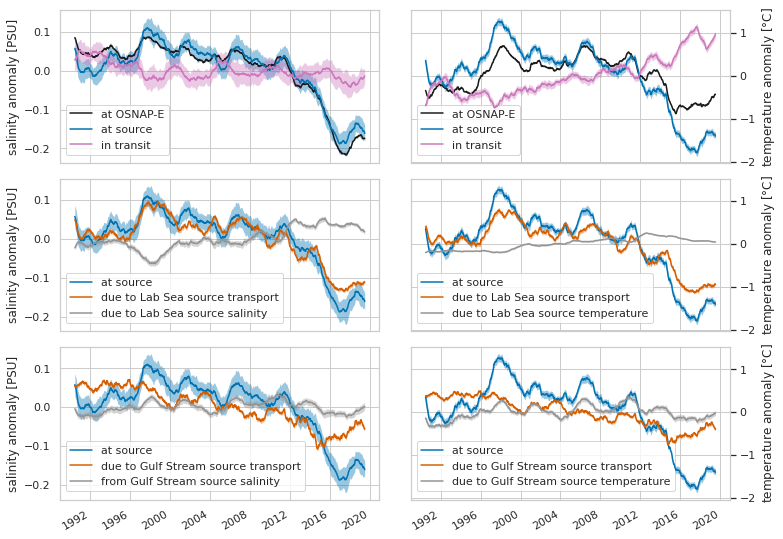

In [87]:
plot_salinity_breakdown(total_mean_1,
                        labcu_mean_1,
                        gulfs_mean_1,
                        other_mean_1,
                        total_mean_0,
                        labcu_mean_0,
                        gulfs_mean_0,
                        other_mean_0,
                        total_sum_1,
                        labcu_sum_1,
                        gulfs_sum_1,
                        other_sum_1,
                        total_sum_0,
                        labcu_sum_0,
                        gulfs_sum_0,
                        other_sum_0,
                        73,
                        'variability_causes')

In [137]:
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[]):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = (ds.rolling(time=roll,center=True).mean()).std(dim='subsetno')
    rolling.plot(ax=ax,color=colour,zorder=10,label=label,dashes=dashes)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


def plot_salinity_breakdown_2(total_mean_a,
                            labcu_mean_a,
                            gulfs_mean_a,
                            other_mean_a,
                            total_mean_b,
                            labcu_mean_b,
                            gulfs_mean_b,
                            other_mean_b,
                            total_sum_a,
                            labcu_sum_a,
                            gulfs_sum_a,
                            other_sum_a,
                            total_sum_b,
                            labcu_sum_b,
                            gulfs_sum_b,
                            other_sum_b,
                            mean_window,
                            figname):
    sns.set(style="whitegrid")
    sns.set_palette("colorblind")
    fig,ax = plt.subplots(4,2,figsize = (12,12),sharex=True,gridspec_kw={'wspace': 0.1,'hspace': 0.1})
    
# salinity    
    
    st_o = total_mean_b.salt
    sl = labcu_mean_a.salt
    sg = gulfs_mean_a.salt
    so = other_mean_a.salt
    
    slbar = sl.mean(dim='time') * sl/sl
    sldash = sl - slbar
    sgbar = sg.mean(dim='time') * sg/sg
    sgdash = sg - sgbar
    sobar = so.mean(dim='time') * so/so
    sodash = so - sobar
    
    vt_o = total_sum_b.vol_trans_normal
    vl = labcu_sum_a.vol_trans_normal
    vg = gulfs_sum_a.vol_trans_normal
    vo = other_sum_a.vol_trans_normal
    
    vlbar = vl.mean(dim='time') * vl/vl
    vldash = vl - vlbar
    vgbar = vg.mean(dim='time') * vg/vg
    vgdash = vg - vgbar
    vobar = vo.mean(dim='time') * vo/vo
    vodash = vo - vobar

    plot_ts_with_errorbars(st_o - st_o.mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'k',
                           label='at OSNAP-E')

    plot_ts_with_errorbars(((sl*vl + sg*vg + so*vo)/vt_o)-
                           ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'C0',
                           label='at source')

    plot_ts_with_errorbars(((st_o-(sl*vl + sg*vg + so*vo)/vt_o))-
                           ((st_o-(sl*vl + sg*vg + so*vo)/vt_o)).mean(dim='time'),
                           mean_window,
                           ax[0,0],
                           'C4',
                           label='in transit')


    
#     ax[0,0].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[0,0].set_ylabel('salinity anomaly [PSU]')
    ax[0,0].set_xlabel('')

    ax[0,0].text(0.05, 0.82, 'OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[0,0].transAxes)
    ax[0,0].text(0.05, 0.42, 'Source', horizontalalignment='left',transform=ax[0,0].transAxes,color='C0')
    ax[0,0].text(0.5, 0.42, 'Transit', horizontalalignment='left',transform=ax[0,0].transAxes,color='C4')
    
    
   
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C0',
                           label='at source')
    
    plot_ts_with_errorbars((((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar))-
                            ((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C3',
                           label='due to Lab Sea source transport')
    
    plot_ts_with_errorbars((((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                           ((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,0],
                           colour='C7',
                           label='due to Lab Sea source salinity')

    ax[1,0].set_ylabel('salinity anomaly [PSU]')
    ax[1,0].set_xlabel('')

    ax[1,0].text(0.4, 0.42, 'Lab Sea transport', horizontalalignment='left',transform=ax[1,0].transAxes,color='C3')
    ax[1,0].text(0.7, 0.15, 'Source', horizontalalignment='left',transform=ax[1,0].transAxes,color='C0')
    ax[1,0].text(0.77, 0.77, 'Lab Sea\nsalinity', horizontalalignment='left',transform=ax[1,0].transAxes,color='C7')
    
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[2,0],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar))-
                            ((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar)).mean(dim='time')),
                           mean_window,
                           ax[2,0],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[2,0],
                           colour='C7',
                           label='from Gulf Stream source salinity')
    
    ax[2,0].set_ylabel('salinity anomaly [PSU]')
    ax[2,0].set_xlabel('')

    ax[2,0].text(0.3, 0.42, 'Gulf Stream transport', horizontalalignment='left',transform=ax[2,0].transAxes,color='C3')
    ax[2,0].text(0.7, 0.15, 'Source', horizontalalignment='left',transform=ax[2,0].transAxes,color='C0')
    ax[2,0].text(0.77, 0.70, 'Gulf Stream\nsalinity', horizontalalignment='left',transform=ax[2,0].transAxes,color='C7')
    
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[3,0],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo))-
                            ((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo)).mean(dim='time')),
                           mean_window,
                           ax[3,0],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[3,0],
                           colour='C7',
                           label='from Gulf Stream source salinity')
    
    ax[3,0].set_ylabel('salinity anomaly [PSU]')
    ax[3,0].set_xlabel('')

    ax[3,0].text(0.25, 0.47, 'Other transport', horizontalalignment='left',transform=ax[3,0].transAxes,color='C3')
    ax[3,0].text(0.7, 0.15, 'Source', horizontalalignment='left',transform=ax[3,0].transAxes,color='C0')
    ax[3,0].text(0.8, 0.67, 'Other\nsalinity', horizontalalignment='left',transform=ax[3,0].transAxes,color='C7')

# temperature    

    st_o = total_mean_b.temp
    sl = labcu_mean_a.temp
    sg = gulfs_mean_a.temp
    so = other_mean_a.temp
    
    slbar = sl.mean(dim='time') * sl/sl
    sldash = sl - slbar
    sgbar = sg.mean(dim='time') * sg/sg
    sgdash = sg - sgbar
    sobar = so.mean(dim='time') * so/so
    sodash = so - sobar
    
    plot_ts_with_errorbars(st_o - st_o.mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'k',
                           label='at OSNAP-E')

    plot_ts_with_errorbars(((sl*vl + sg*vg + so*vo)/vt_o)-
                           ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'C0',
                           label='at source')

    plot_ts_with_errorbars(((st_o-(sl*vl + sg*vg + so*vo)/vt_o))-
                           ((st_o-(sl*vl + sg*vg + so*vo)/vt_o)).mean(dim='time'),
                           mean_window,
                           ax[0,1],
                           'C4',
                           label='in transit')


    
#     ax[0,1].legend(bbox_to_anchor=(0.0, 0.02),loc='lower left')
    ax[0,1].yaxis.set_label_position("right")
    ax[0,1].yaxis.tick_right()
    ax[0,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[0,1].set_xlabel('')

    ax[0,1].text(0.82, 0.5, 'OSNAP$_\mathrm{E}$', horizontalalignment='left',transform=ax[0,1].transAxes)
    ax[0,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[0,1].transAxes,color='C0')
    ax[0,1].text(0.7, 0.82, 'Transit', horizontalalignment='left',transform=ax[0,1].transAxes,color='C4')
    
   
    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C0',
                           label='at source')
    
    plot_ts_with_errorbars((((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar))-
                            ((slbar*vl + sgbar*vgbar + sobar*vobar)/(vl+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C3',
                           label='due to Lab Sea source transport')
    
    plot_ts_with_errorbars((((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                           ((sl*vlbar + sgbar*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean(dim='time')),
                           mean_window,
                           ax[1,1],
                           colour='C7',
                           label='due to Lab Sea source temperature')
    ax[1,1].yaxis.set_label_position("right")
    ax[1,1].yaxis.tick_right()
    ax[1,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[1,1].set_xlabel('')

    ax[1,1].text(0.35, 0.42, 'Lab Sea transport', horizontalalignment='left',transform=ax[1,1].transAxes,color='C3')
    ax[1,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[1,1].transAxes,color='C0')
    ax[1,1].text(0.73, 0.7, 'Lab Sea\ntemperature', horizontalalignment='left',transform=ax[1,1].transAxes,color='C7')

    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[2,1],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar))-
                            ((slbar*vlbar + sgbar*vg + sobar*vobar)/(vlbar+vg+vobar)).mean(dim='time')),
                           mean_window,
                           ax[2,1],
                           colour='C3',
                           label='due to Gulf Stream source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sg*vgbar + sobar*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[2,1],
                           colour='C7',
                           label='due to Gulf Stream source temperature')
    
    ax[2,1].yaxis.set_label_position("right")
    ax[2,1].yaxis.tick_right()
    ax[2,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[2,1].set_xlabel('')

    ax[2,1].text(0.3, 0.42, 'Gulf Stream transport', horizontalalignment='left',transform=ax[2,1].transAxes,color='C3')
    ax[2,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[2,1].transAxes,color='C0')
    ax[2,1].text(0.73, 0.7, 'Gulf Stream\ntemperature', horizontalalignment='left',transform=ax[2,1].transAxes,color='C7')

    plot_ts_with_errorbars((((sl*vl + sg*vg + so*vo)/vt_o)-
                            ((sl*vl + sg*vg + so*vo)/vt_o).mean(dim='time')),
                           mean_window,
                           ax[3,1],
                           colour='C0',
                           label='at source')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo))-
                            ((slbar*vlbar + sgbar*vgbar + sobar*vo)/(vlbar+vgbar+vo)).mean(dim='time')),
                           mean_window,
                           ax[3,1],
                           colour='C3',
                           label='due to Other source transport')
    plot_ts_with_errorbars((((slbar*vlbar + sgbar*vgbar + so*vobar)/(vlbar+vgbar+vobar))-
                            ((slbar*vlbar + sgbar*vgbar + so*vobar)/(vlbar+vgbar+vobar)).mean()),
                           mean_window,
                           ax[3,1],
                           colour='C7',
                           label='due to Other source temperature')
    
    ax[3,1].yaxis.set_label_position("right")
    ax[3,1].yaxis.tick_right()
    ax[3,1].set_ylabel('temperature anomaly [$\degree$C]')
    ax[3,1].set_xlabel('')

    ax[3,1].text(0.25, 0.45, 'Other transport', horizontalalignment='left',transform=ax[3,1].transAxes,color='C3')
    ax[3,1].text(0.68, 0.15, 'Source', horizontalalignment='left',transform=ax[3,1].transAxes,color='C0')
    ax[3,1].text(0.75, 0.65, 'Other\ntemperature', horizontalalignment='left',transform=ax[3,1].transAxes,color='C7')

   
#     ax[4].set_xlabel('')

    plt.savefig(project_path / figure_path / Path(figname + '.png'), bbox_inches='tight')
    plt.savefig(project_path / figure_path / Path(figname + '.pdf'), bbox_inches='tight')
    
    
    return

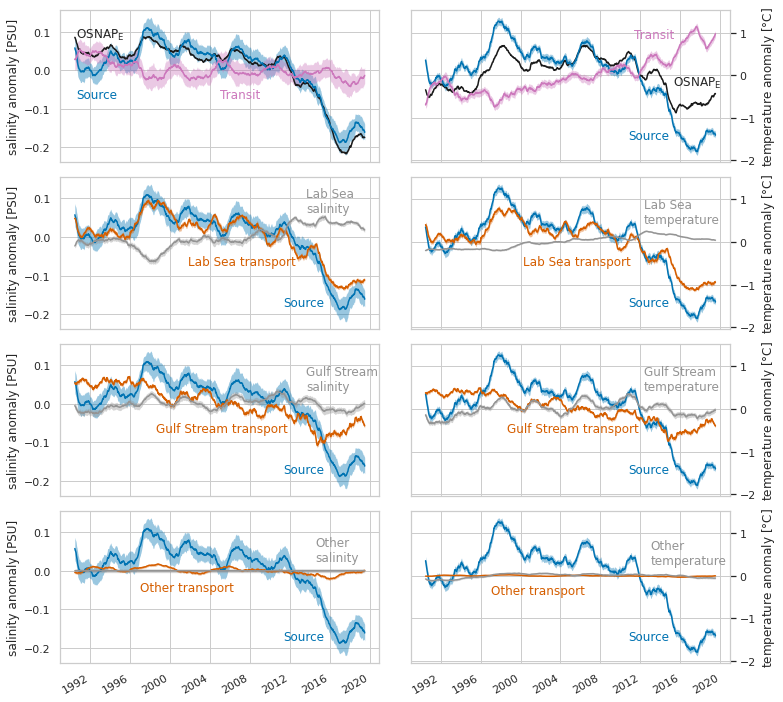

In [138]:
plot_salinity_breakdown_2(total_mean_1,
                        labcu_mean_1,
                        gulfs_mean_1,
                        other_mean_1,
                        total_mean_0,
                        labcu_mean_0,
                        gulfs_mean_0,
                        other_mean_0,
                        total_sum_1,
                        labcu_sum_1,
                        gulfs_sum_1,
                        other_sum_1,
                        total_sum_0,
                        labcu_sum_0,
                        gulfs_sum_0,
                        other_sum_0,
                        73,
                        'variability_causes_2')

In [35]:
total_mean_1

<xarray.Dataset>
Dimensions:           (subsetno: 32, time: 2189)
Coordinates:
  * time              (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-2...
Dimensions without coordinates: subsetno
Data variables: (12/32)
    trajectory        (subsetno, time) float64 1.484e+06 1.516e+06 ... 1.418e+06
    lat               (subsetno, time) float64 37.74 37.72 37.66 ... 43.24 43.61
    lon               (subsetno, time) float64 -65.49 -65.8 ... -60.69 -61.56
    z                 (subsetno, time) float64 317.3 334.4 316.0 ... 323.5 294.4
    mxl               (subsetno, time) float32 56.7 58.38 55.11 ... 62.44 61.8
    temp              (subsetno, time) float32 12.54 12.05 12.16 ... 9.252 9.138
    ...                ...
    depth_transport   (subsetno, time) float64 0.1961 0.1868 ... 0.2491 0.2782
    lon_transport     (subsetno, time) float64 -0.05097 -0.03889 ... -0.05812
    tempxvol          (subsetno, time) float64 0.3441 0.3366 ... 0.2997 0.2492
    saltxvol          (subsetno, time) float64 1.089 1.01 1.048 ... 1.084 0.9943
    depthxvol         (subsetno, time) float64 9.328 9.834 10.14 ... 11.24 8.784
    lonxvol           (subsetno, time) float64 -1.988 -1.841 ... -1.852 -1.731
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.2
    parcels_mesh:           spherical